In [1]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Libaries')

In [2]:
# Importing self-made libaries

import reload_lib as rl
import sensitivity as st
import life_cycle_assessment as lc
import lcia_results as lr
import non_bio_co2 as nbc
import standards as s
import import_ecoinvent_and_databases as ied
import results_figures as rfig


lib = [lc, lr, nbc, s, ied, rfig, st]
rl.reload_lib(lib)

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
Recipe is selected
Biosphere is already present in the project.
Ecoinvent 3.9.1 is already present in the project.
You selected to not reload
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care

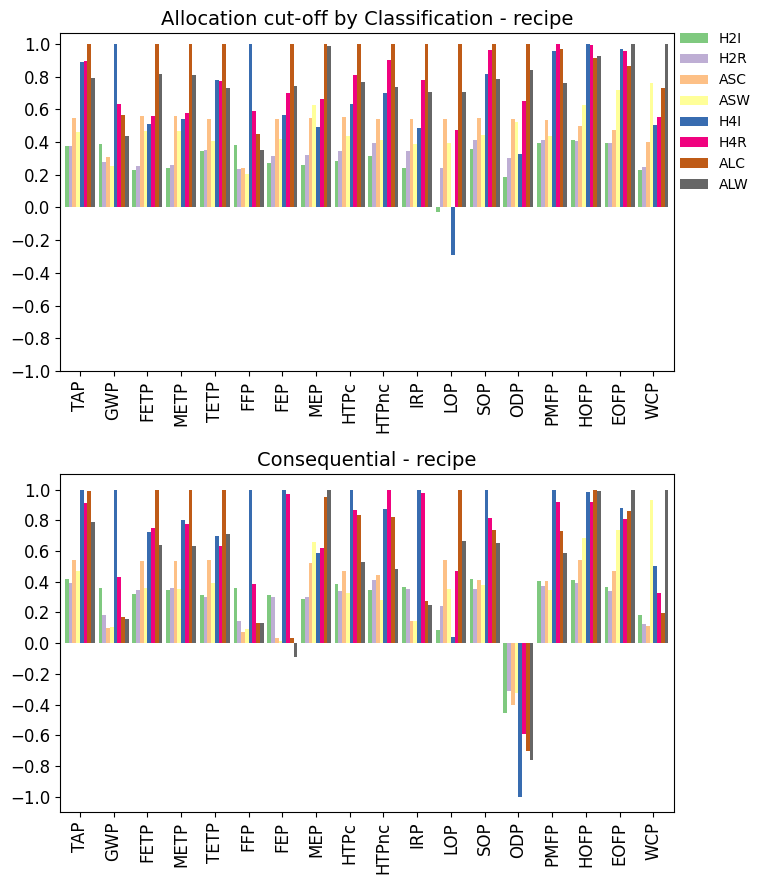

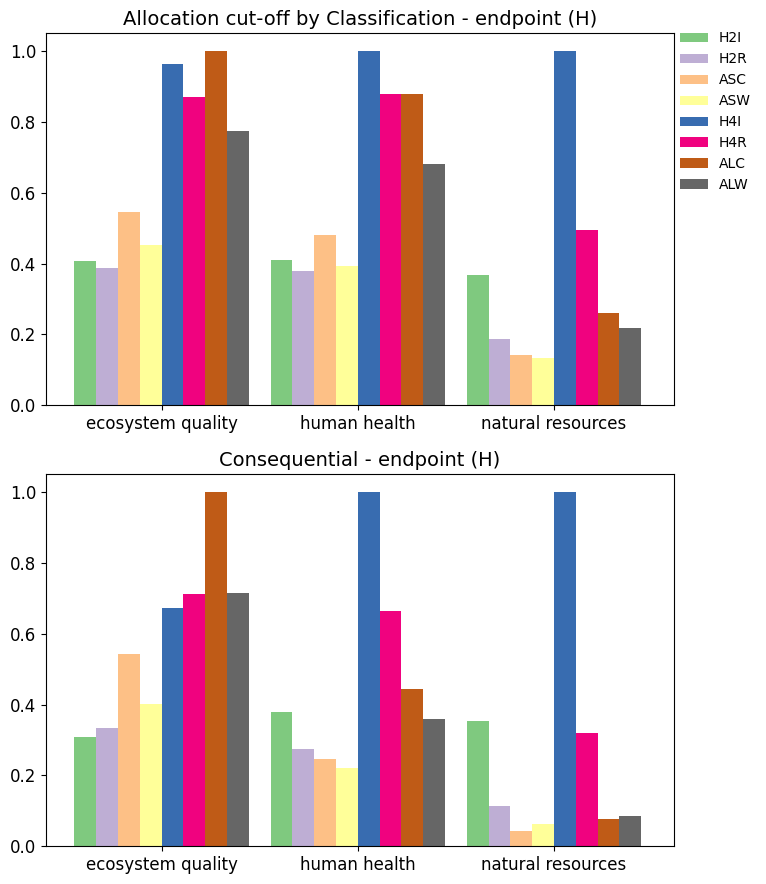

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1


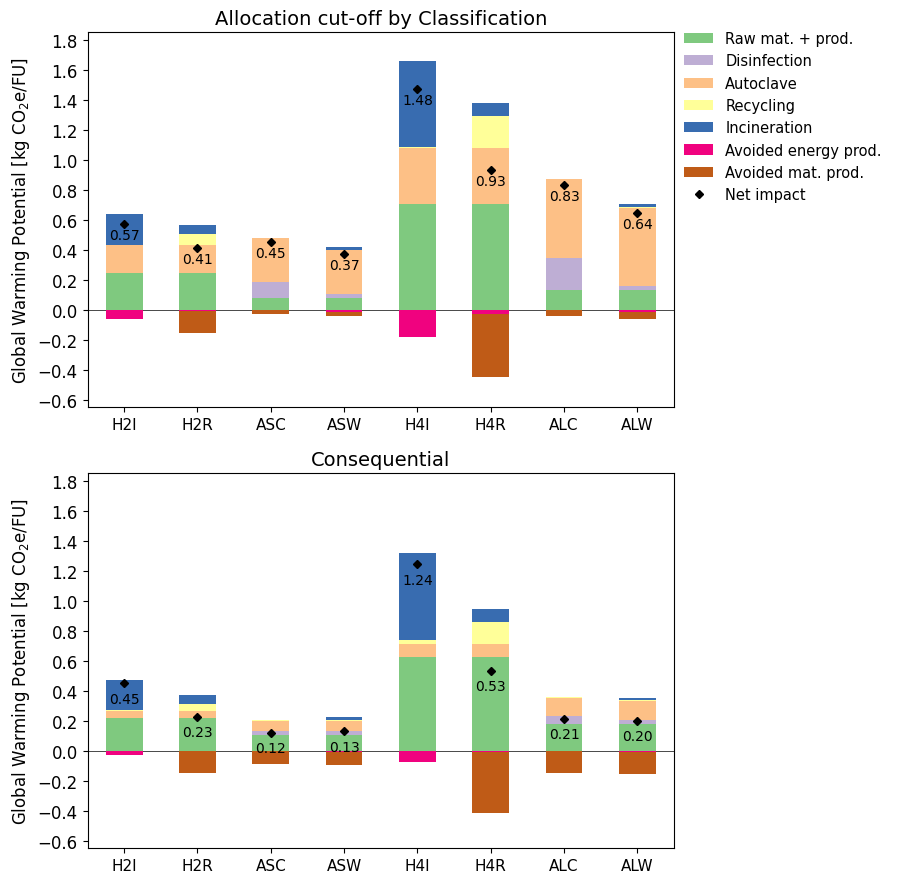

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1


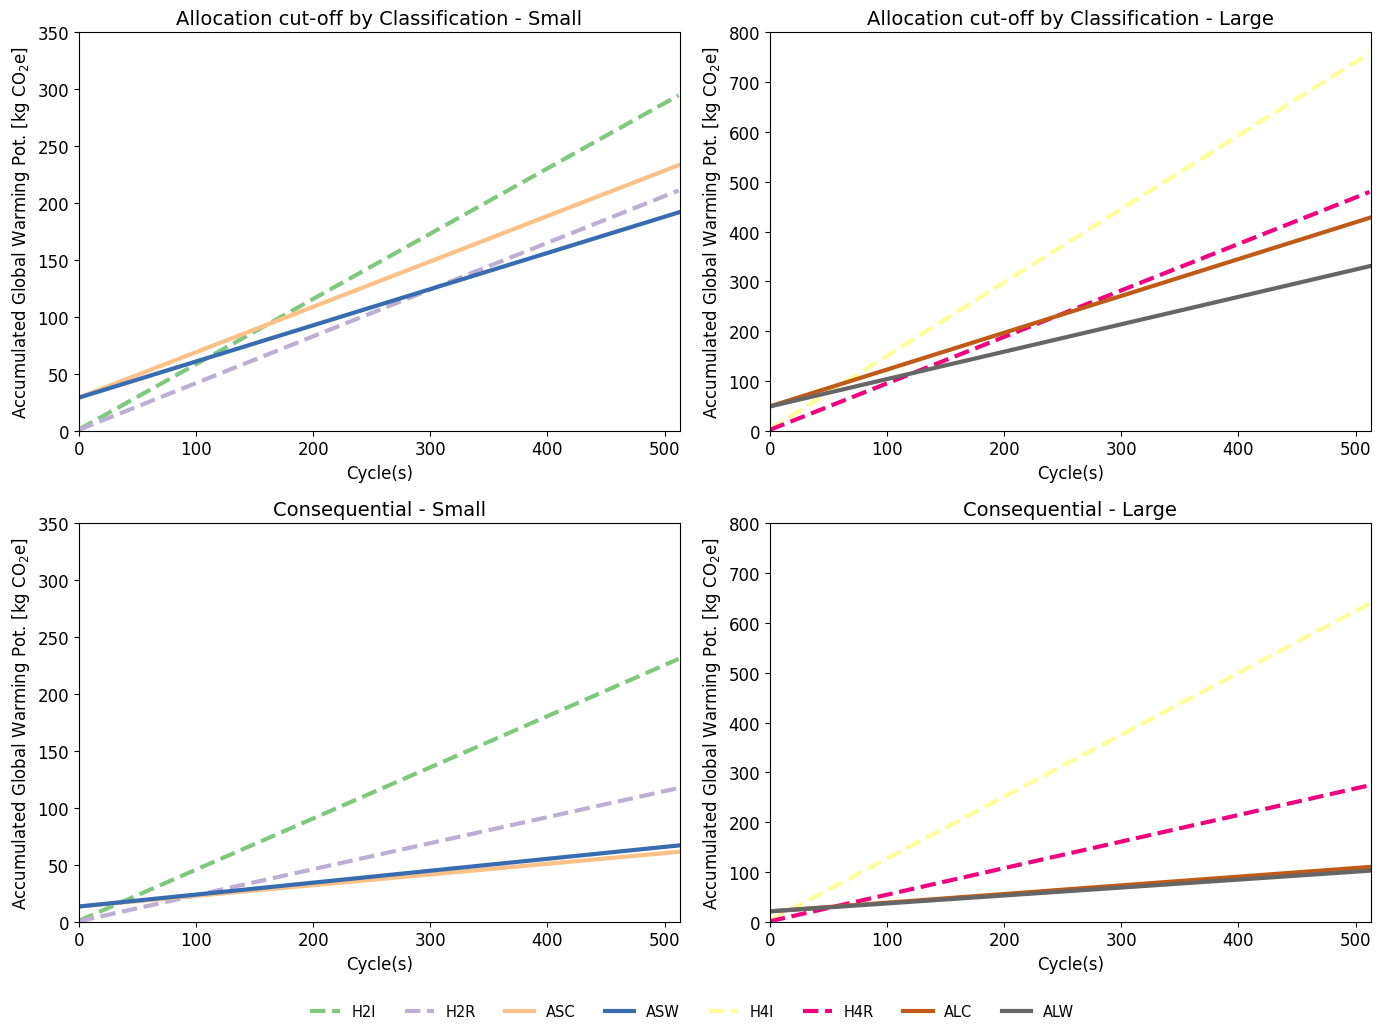

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
Recipe is selected
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 alrea

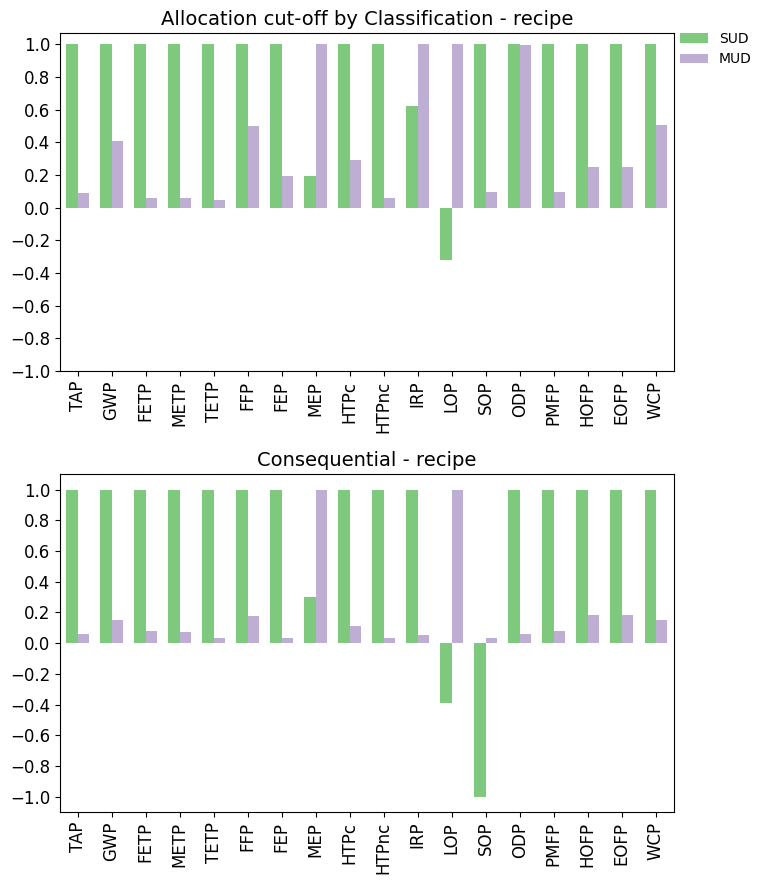

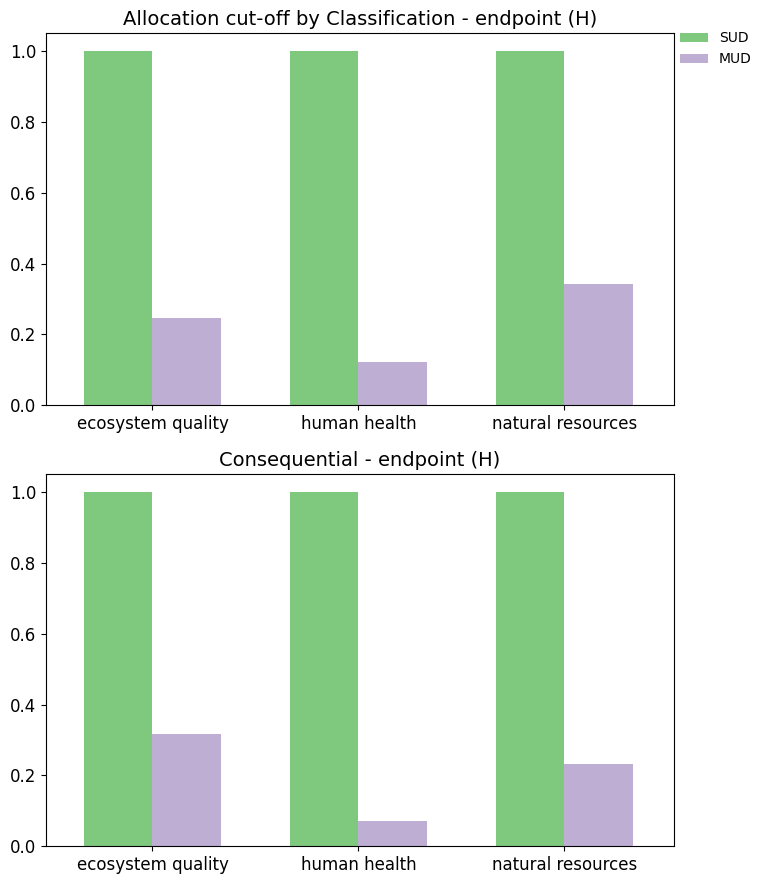

case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2


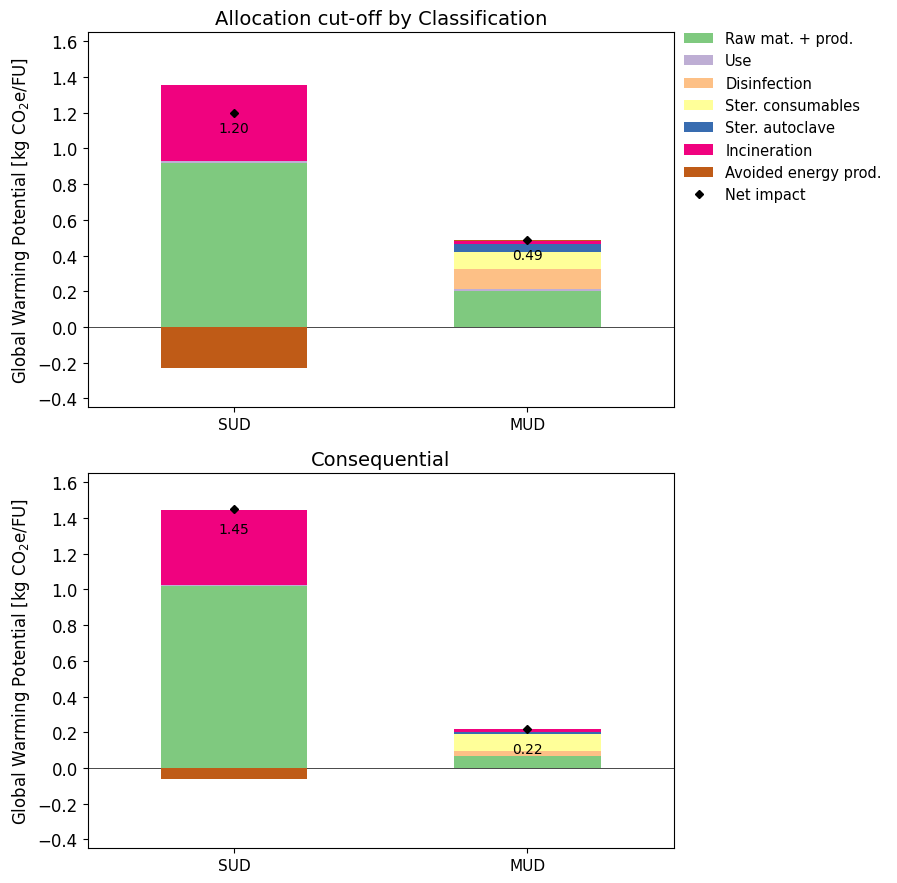

case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2


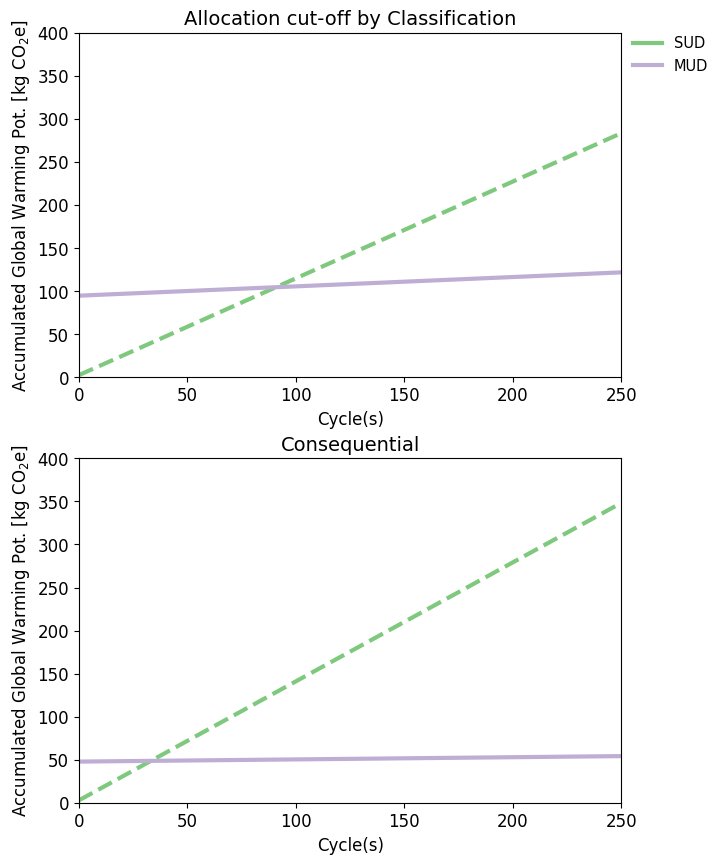

case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
Recipe is selected
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case1 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case1
case2 already exist
C:/Users/ruw/Desktop\RA\Single-use-vs-multi-use-in-health-care\results/case2
case2 alrea

In [29]:
rl.reload_lib(lib)
path = r'C:/Users/ruw/Desktop'
path_github, ecoinevnt_paths, system_path = s.paths(path)
case = ['case1', 'case2']

for c in case:
    rfig.create_results_figures(c, path_github, ecoinevnt_paths, system_path) # Calculating the results and creating the figures
    lr.break_even_dataframe(path_github, c) # Obtaining when each case for multi use break even to single use
    st.iterative_save_sensitivity_results_to_excel(path_github, c) # Performing the sensitivity analysis